In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pywt

In [2]:
mode = pywt.Modes.smooth

In [3]:
data = pywt.data.ecg()

(1024,)
(516,)
(262,)
(135,)
(72,)


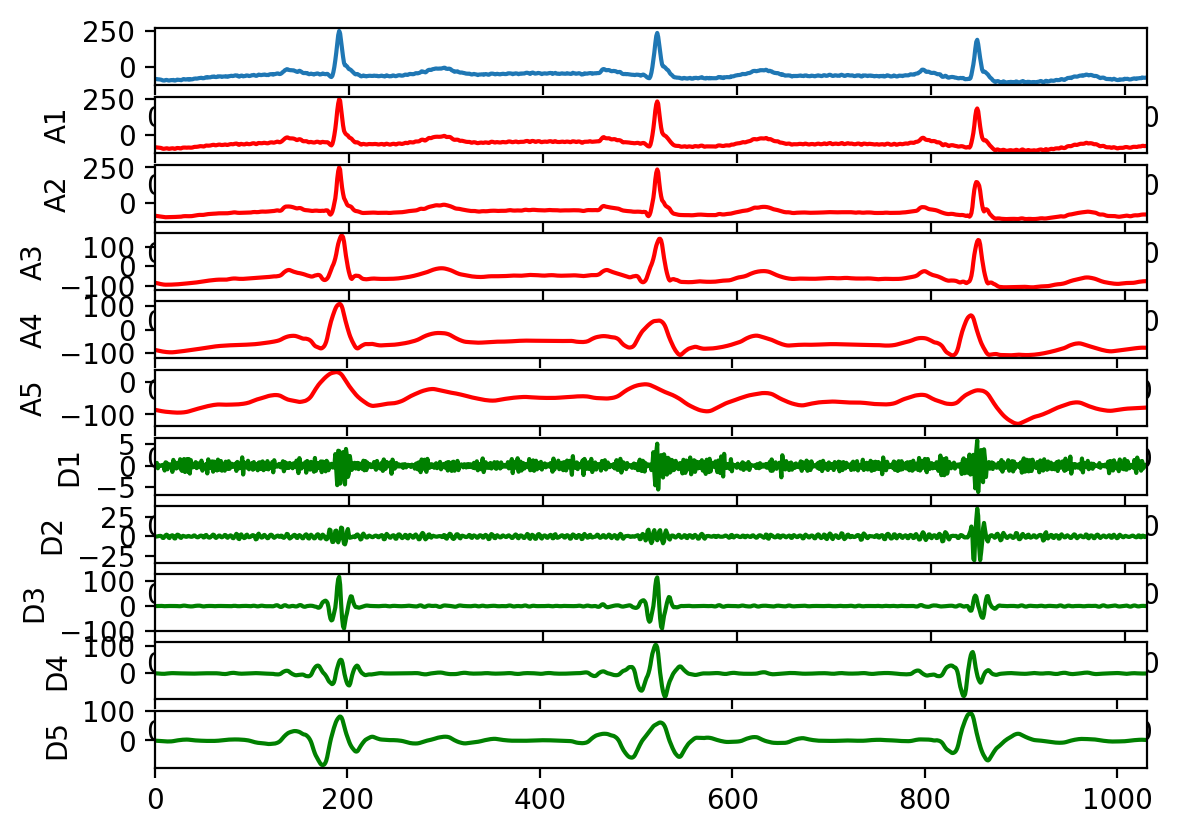

In [4]:
w = pywt.Wavelet('sym5')
a = data
ca = []
cd = []
for i in range(5):
    print(a.shape)
    (a, d) = pywt.dwt(a, w, mode)
    ca.append(a)
    cd.append(d)

rec_a = []
rec_d = []

for i, coeff in enumerate(ca):
    coeff_list = [coeff, None] + [None] * i
    rec_a.append(pywt.waverec(coeff_list, w))

for i, coeff in enumerate(cd):
    coeff_list = [None, coeff] + [None] * i
    rec_d.append(pywt.waverec(coeff_list, w))

fig, axes = plt.subplots(nrows=1 + len(rec_a)+ len(rec_d))
ax = axes[0]
ax.plot(data)
ax.set_xlim(0, len(data) - 1)
ax_idx = 1

for i, y in enumerate(rec_a):
    ax = axes[ax_idx]
    ax.plot(y, 'r')
    ax.set_xlim(0, len(y) - 1)
    ax.set_ylabel("A%d" % (i + 1))
    
    ax_idx += 1
    

for i, y in enumerate(rec_d):
    ax = axes[ax_idx]
    ax.plot(y, 'g')
    ax.set_xlim(0, len(y) - 1)
    ax.set_ylabel("D%d" % (i + 1))
    
    ax_idx += 1
    


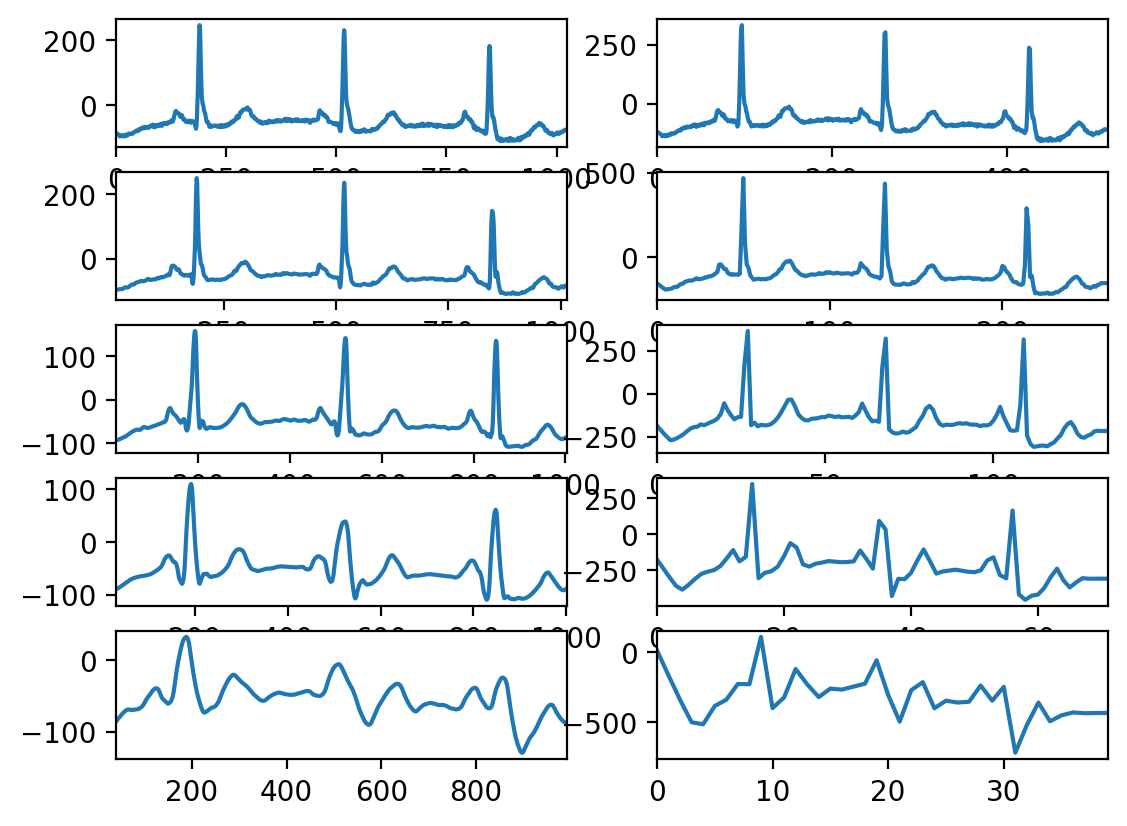

In [5]:
fig, axes = plt.subplots(nrows=len(rec_a), ncols=2)
for i, x, in enumerate(rec_a):
    
    ax = axes[i, 0]
    ax.plot(x)
    ax.set_xlim(w.dec_len * i, len(x) - 1 - w.dec_len * i)
    
    x2 = ca[i]
    ax = axes[i, 1]
    ax.plot(x2)
    ax.set_xlim(0, len(x2) - 1)

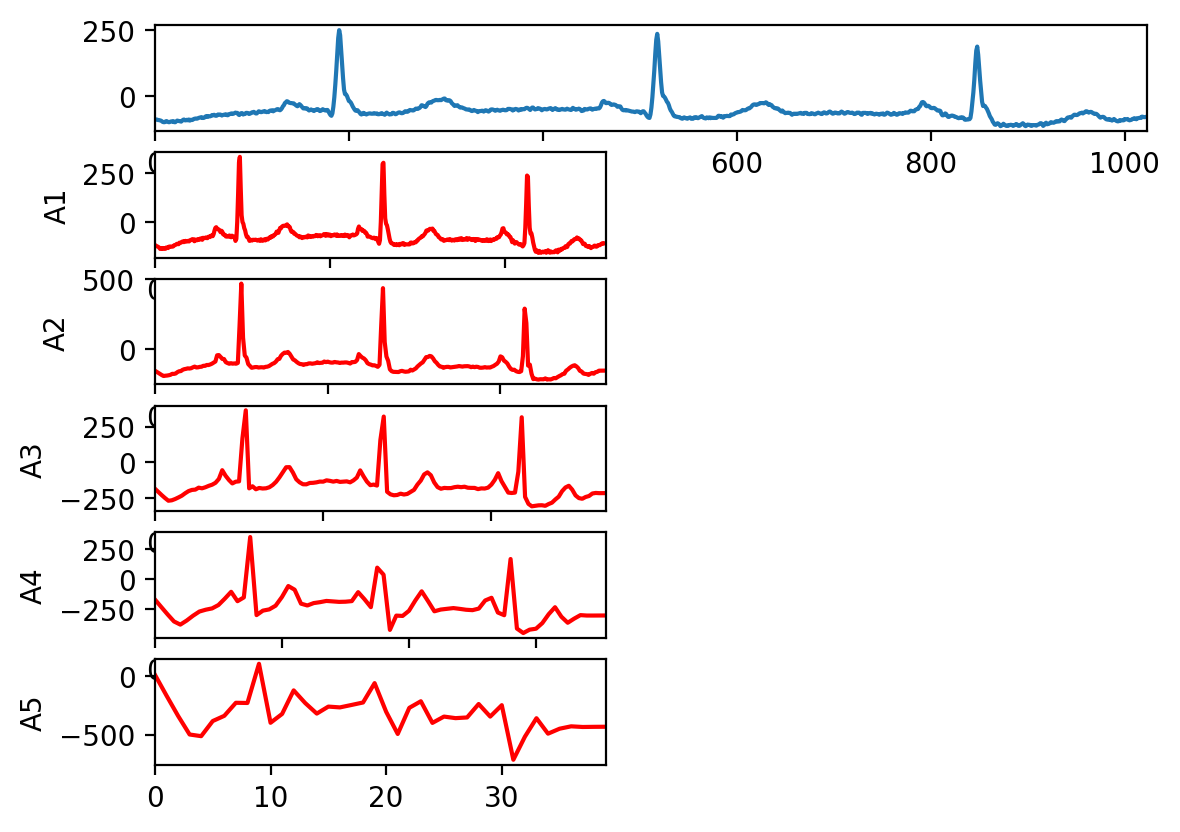

In [6]:
fig = plt.figure()
ax_main = fig.add_subplot(len(ca) + 1, 1, 1)
ax_main.plot(data)
ax_main.set_xlim(0, len(data) - 1)

for i, x in enumerate(ca):
    ax = fig.add_subplot(len(ca) + 1, 2, 3 + i * 2)
    ax.plot(x, 'r')
    ax.set_ylabel("A%d" % (i + 1))
    
    ax.set_xlim(0, len(x) - 1)

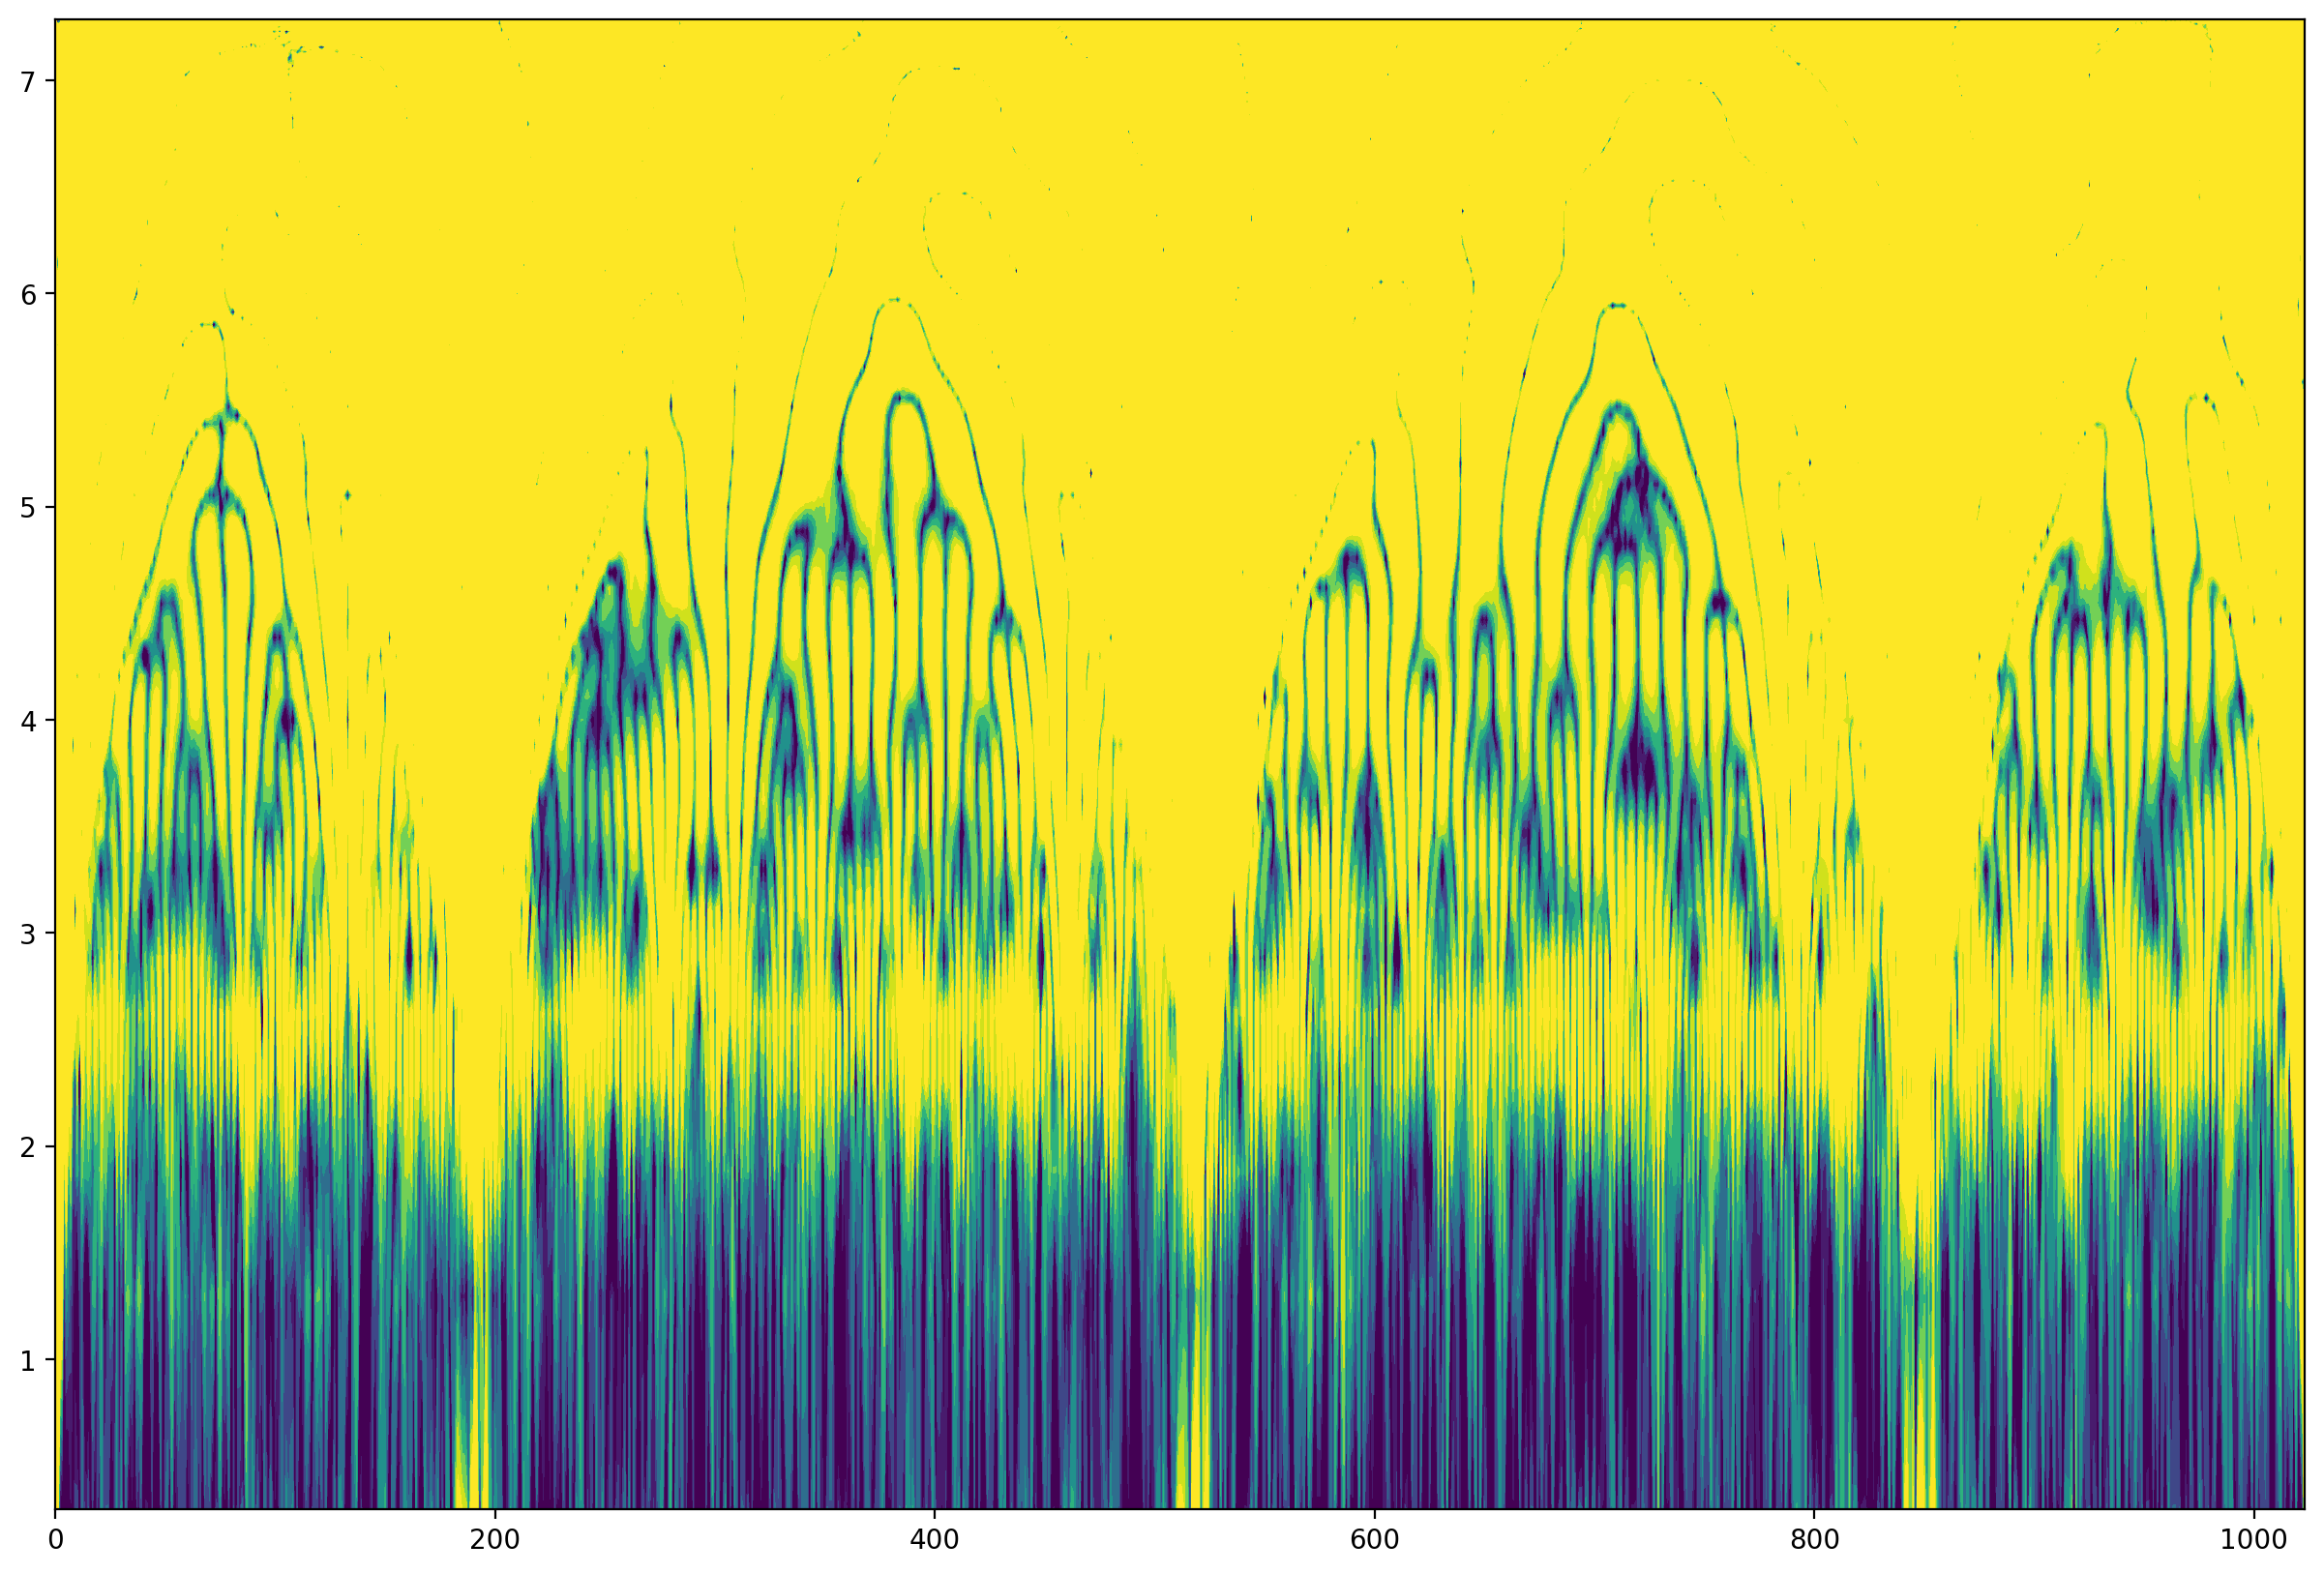

In [7]:
scales = np.arange(1, 128)
dt = 1

[cfs, frequencies] = pywt.cwt(data, scales, 'morl', dt)
power = (abs(cfs)) ** 2

time = np.arange(len(data))

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), 
            levels=np.log2(levels),
            extend='both')

In [8]:
data_folder = "../../data/william/"
f_name = f'{data_folder}/preprocessed_data.csv'
df = pd.read_csv(f_name, index_col=0)
df

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,standing,0.955103,0.980847,0.957441,0.969137,0.942119,0.980482,0.978113,0.955997,1.013315,...,-0.565791,-0.567899,-0.562551,-0.556008,-0.556082,-0.541746,-0.531322,-0.544508,-0.555121,-0.556750
1,standing,0.746853,0.745261,0.736202,0.718512,0.732662,0.748627,0.758345,0.760316,0.776631,...,-0.705048,-0.751121,-0.275749,-0.391455,-0.492168,-0.570901,-0.650086,-0.663472,-0.671705,-0.674668
2,standing,0.081072,0.105532,0.077026,0.072245,0.078280,0.059172,0.066330,0.038346,0.052710,...,-0.946423,-0.675716,-0.758653,-0.761669,-0.851163,-0.868032,-0.841157,-0.863191,-0.847677,-0.838582
3,standing,-0.572528,-0.575000,-0.568788,-0.568225,-0.562717,-0.563058,-0.560743,-0.527442,-0.544535,...,-0.138148,0.213869,-0.242437,-0.613937,-0.359906,-0.399616,-0.305593,-0.243141,-0.292493,-0.304720
4,standing,0.817609,0.847631,0.848146,0.858834,0.871386,0.872207,0.870972,0.850934,0.858820,...,-0.669837,-0.324956,-0.500763,-0.552365,-0.704728,-0.782289,-0.790926,-0.850843,-0.860183,-0.856021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,sitting,-0.891929,-0.861525,-0.865612,-0.874328,-0.865734,-0.866459,-0.851838,-0.861870,-0.852673,...,0.665441,0.845126,0.775424,0.717441,0.780752,0.772155,0.806261,0.791058,0.765062,0.762455
346,sitting,-0.561233,-0.604426,-0.588617,-0.568568,-0.584629,-0.548220,-0.548859,-0.547274,-0.548542,...,-0.100312,-0.378402,-0.243453,-0.242664,-0.172963,-0.157518,-0.148306,-0.113126,-0.117075,-0.121701
347,sitting,-0.492987,-0.538433,-0.537444,-0.548303,-0.568840,-0.563281,-0.581720,-0.587226,-0.574562,...,-0.598585,-0.437462,-0.465312,-0.506304,-0.629441,-0.637448,-0.638536,-0.639509,-0.616623,-0.610518
348,sitting,-0.872260,-0.871876,-0.878281,-0.873322,-0.873949,-0.865620,-0.862452,-0.875465,-0.866477,...,0.800472,0.638085,0.745030,0.819705,0.669645,0.836797,0.786710,0.706549,0.776906,0.802390


In [9]:
standing = df.loc[df.label=="standing"].iloc[:, 1:].values
sitting = df.loc[df.label=="sitting"].iloc[:, 1:].values

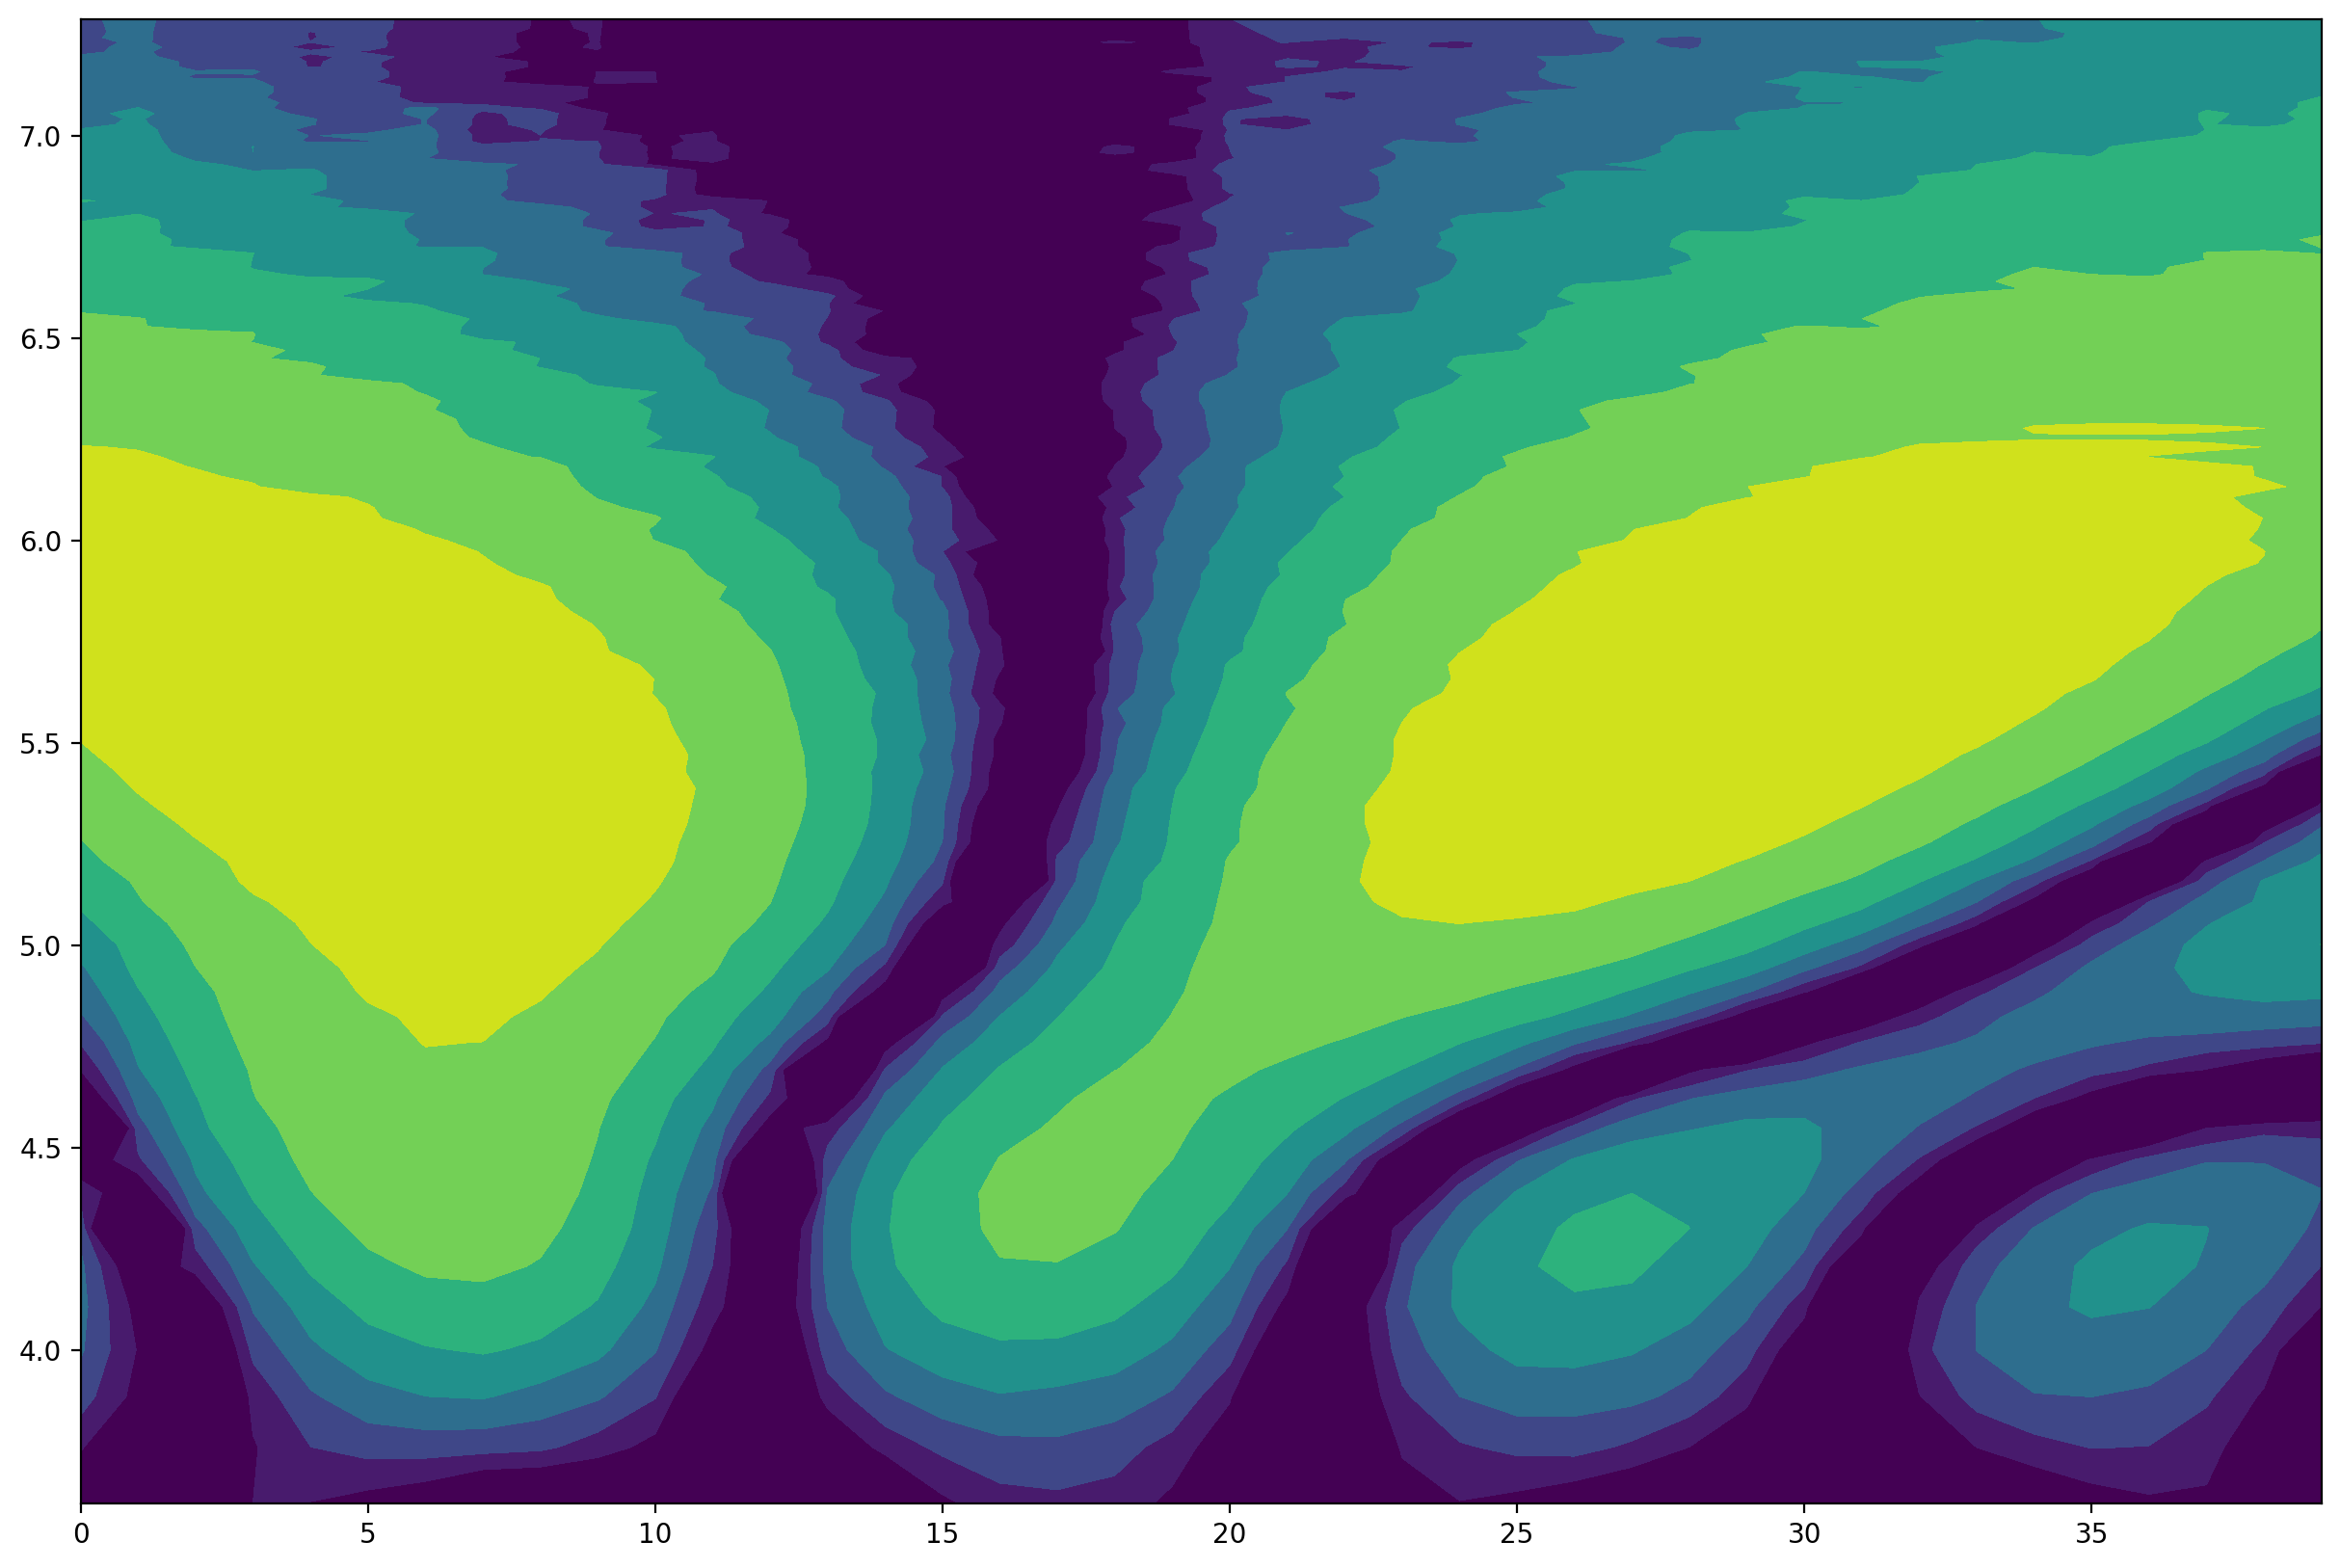

In [10]:
data = standing[0]

scales = np.arange(10, 128)
dt = 1

[cfs, frequencies] = pywt.cwt(data, scales, 'morl', dt)
power = (abs(cfs)) ** 2

time = np.arange(len(data))

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), 
            levels=np.log2(levels),
            extend='both')

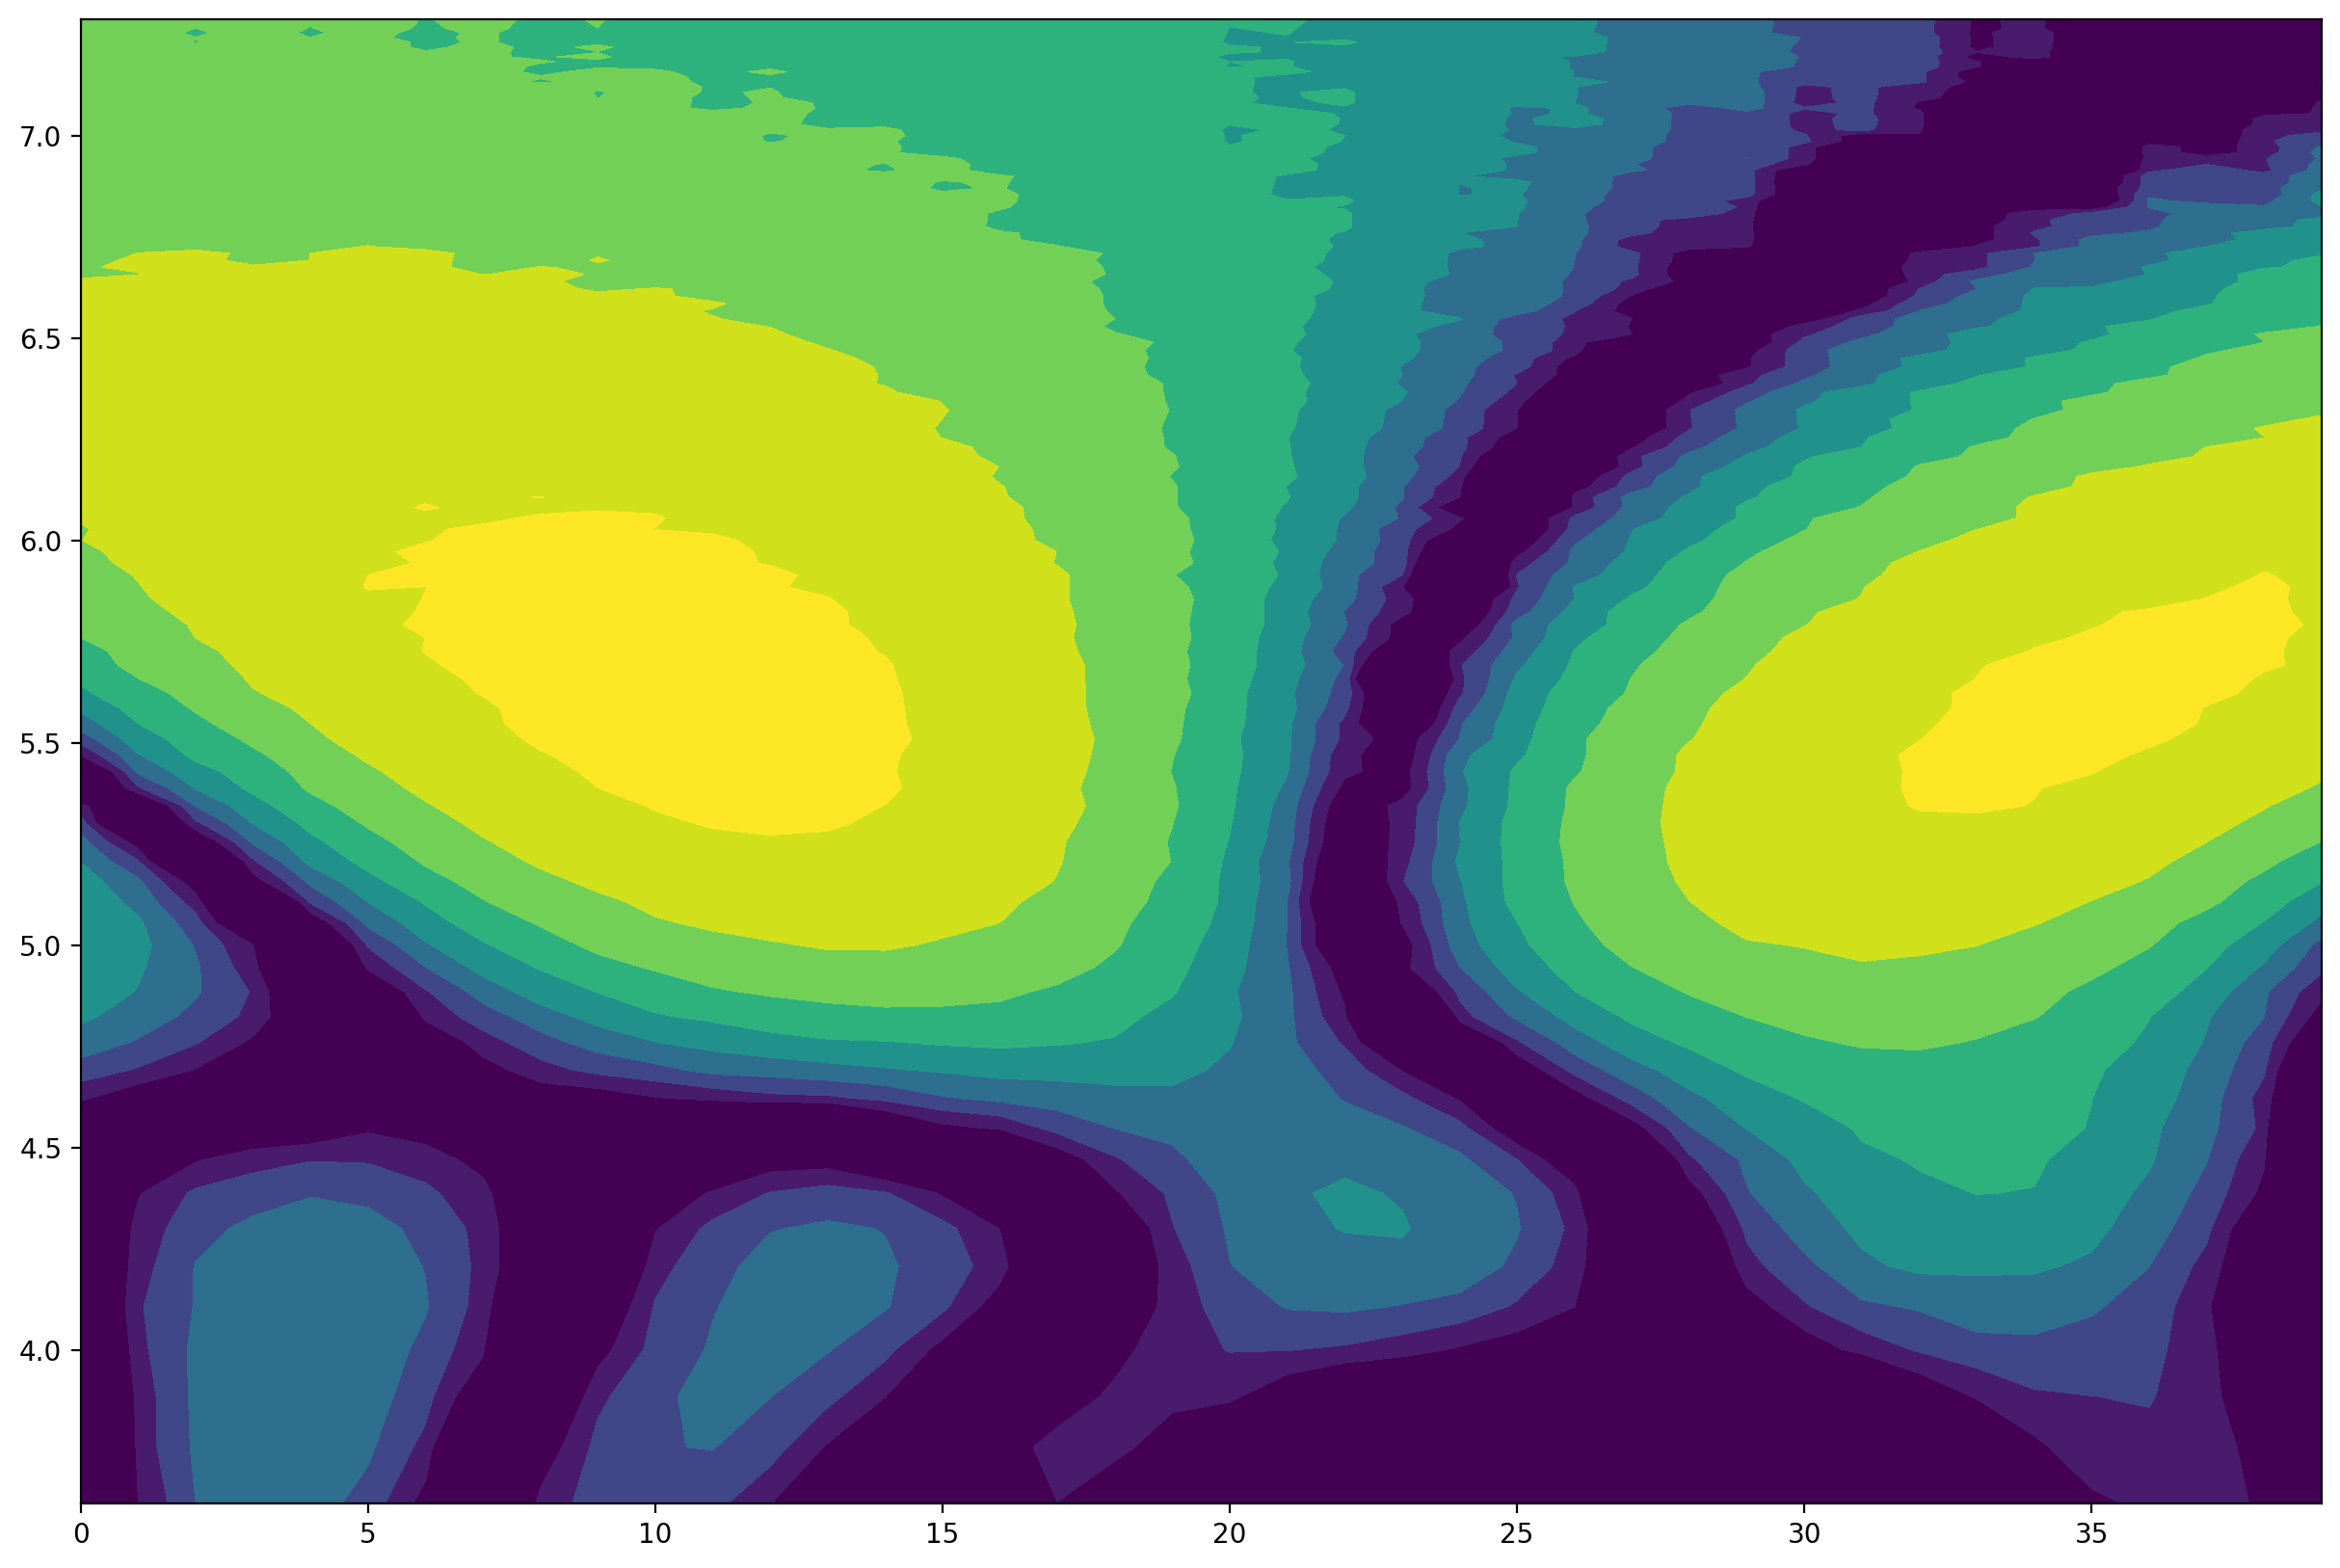

In [11]:
data = sitting[1]

scales = np.arange(10, 128)
dt = 1

[cfs, frequencies] = pywt.cwt(data, scales, 'morl', dt)
power = (abs(cfs)) ** 2

time = np.arange(len(data))

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), 
            levels=np.log2(levels),
            extend='both')

In [12]:
def remove_axis_decorations(axes):

    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

In [13]:
fig_folder = "../../fig/william/wavelet"

10


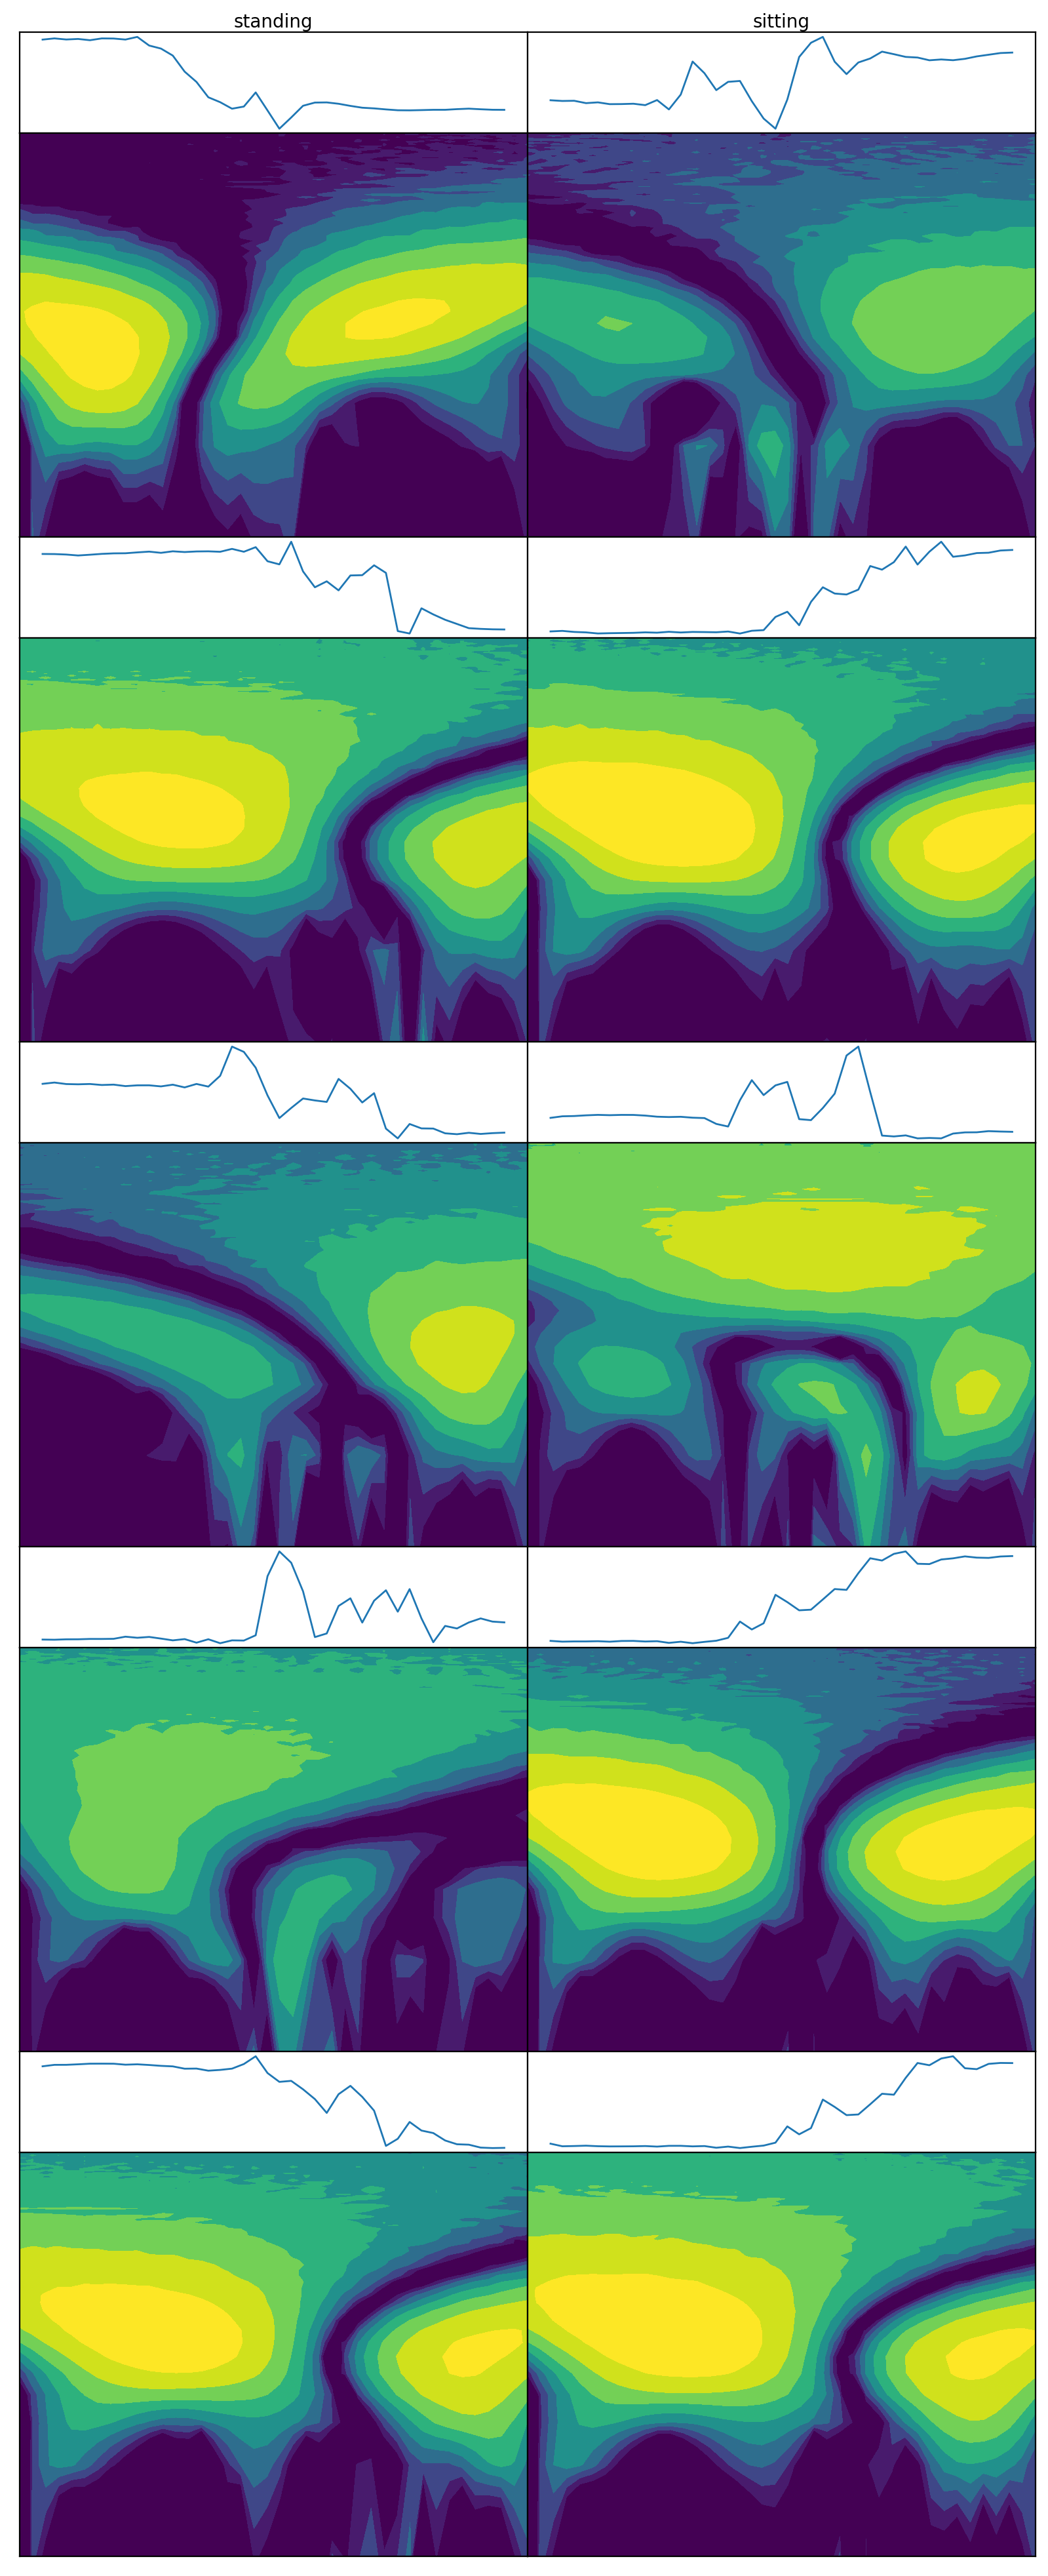

In [38]:
labels = list(df.label.unique())
n = 5
scales = np.arange(1, 128, 2)
dt = 1
wavelet = 'mexh' #'cgau1'  #'morl'

single_plot_size = 5

height_ratios = []
for _ in range(n):
    height_ratios += [1, 4]
    
print(len(height_ratios))

fig, axes = plt.subplots(
    figsize=(single_plot_size*2, single_plot_size*n),
    nrows=len(height_ratios),
    ncols=len(labels),
    height_ratios=height_ratios)

remove_axis_decorations(axes)
fig.subplots_adjust(wspace=0, hspace=0)

for column, label in enumerate(labels):
    for i in range(0, n*2, 2):
        
        x = df[df.label==label].iloc[i//2, 1:].values.astype(np.float64)

        ax = axes[i, column]
        ax.plot(x, lw=1.0)
        
        ax = axes[i+1, column]
            
        [cfs, frequencies] = pywt.cwt(x, scales, wavelet, dt)
        power = cfs**2

        time = np.arange(len(data))

        period = 1. / frequencies
        levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
        ax.contourf(time, np.log2(period), np.log2(power), 
                    levels=np.log2(levels),
                    extend='both')

    ax = axes[0, column]
    ax.text(0.5, 1.1, label,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

In [39]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [40]:
cfs.shape

(64, 40)

In [41]:
power = (abs(cfs)) ** 2

In [42]:
period.shape

(64,)

In [43]:
scales.shape

(64,)

In [ ]:
len()